In [32]:
import pandas as pd
import numpy as np
from pprint import pprint

In [3]:
df = pd.read_csv("Backend/dataset/diabetic_data.csv")
df = df.drop(columns=["weight", "max_glu_serum", "payer_code"])
df = df.replace("?", "").replace("None", "")

treatments = [
    "metformin", 
    "repaglinide", 
    "nateglinide", 
    "chlorpropamide", 
    "glimepiride", 
    "acetohexamide", 
    "glipizide", 
    "glyburide", 
    "tolbutamide", 
    "pioglitazone", 
    "rosiglitazone", 
    "acarbose", 
    "miglitol", 
    "troglitazone", 
    "tolazamide", 
    "examide", 
    "citoglipton", #stiagliptin
    "insulin", 
    "glyburide-metformin", 
    "glipizide-metformin", 
    "glimepiride-pioglitazone", 
    "metformin-rosiglitazone", 
    "metformin-pioglitazone"
]

In [4]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [33]:
biglist = df.to_dict(orient='records')

#result = dict(zip(treatments, [0 for _ in range(len(treatments))]))
result = [
    [],
    [],
    [],
    [],
    [],
    [],
]

for line in biglist:
    temp = []
    for i, k in enumerate(treatments):
        if line[k] != 'No':
            temp.append(f"{i+1}-{line[k]}")
    for i, code in enumerate(temp + [np.nan for _ in range(6-len(temp))]):
        result[i].append(code)

In [34]:
df2 = df.drop(columns=treatments)
for i in range(6):
    df2[f"T{i+1}"] = result[i]

In [35]:
df2[df2["T6"] != '']

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,A1Cresult,change,diabetesMed,readmitted,T1,T2,T3,T4,T5,T6
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,,No,No,NO,NaN,NaN,NaN,NaN,NaN,NaN
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,,...,,Ch,Yes,>30,18-Up,NaN,NaN,NaN,NaN,NaN
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,,...,,No,Yes,NO,7-Steady,NaN,NaN,NaN,NaN,NaN
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,,...,,Ch,Yes,NO,18-Up,NaN,NaN,NaN,NaN,NaN
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,,...,,Ch,Yes,NO,7-Steady,18-Steady,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,,...,>8,Ch,Yes,>30,1-Steady,18-Down,NaN,NaN,NaN,NaN
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,,...,,No,Yes,NO,18-Steady,NaN,NaN,NaN,NaN,NaN
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,,...,,Ch,Yes,NO,1-Steady,18-Down,NaN,NaN,NaN,NaN
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,...,,Ch,Yes,NO,7-Steady,10-Steady,18-Up,NaN,NaN,NaN


In [36]:
df2.to_csv("Backend/dataset/diabetic_data_filtered.csv")

Avec ce premier filtrage, on réduit de 30% la taille du dataset sans perdre trop d'informations

In [37]:
df2 = df2.set_index("encounter_id").sort_index()
df2

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,A1Cresult,change,diabetesMed,readmitted,T1,T2,T3,T4,T5,T6
encounter_id,,,,,,,,,,,,,,,,,,,,,
12522,48330783,Caucasian,Female,[80-90),2,1,4,13,,68,...,,Ch,Yes,NO,7-Steady,18-Steady,NaN,NaN,NaN,NaN
15738,63555939,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,33,...,,Ch,Yes,NO,11-Steady,18-Steady,NaN,NaN,NaN,NaN
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,,51,...,,Ch,Yes,NO,7-Steady,18-Steady,NaN,NaN,NaN,NaN
28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,,47,...,,No,Yes,>30,18-Steady,NaN,NaN,NaN,NaN,NaN
35754,82637451,Caucasian,Male,[50-60),2,1,2,3,,31,...,,No,Yes,>30,18-Steady,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,,51,...,>8,Ch,Yes,>30,1-Steady,18-Down,NaN,NaN,NaN,NaN
443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,,33,...,,No,Yes,NO,18-Steady,NaN,NaN,NaN,NaN,NaN
443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,,53,...,,Ch,Yes,NO,1-Steady,18-Down,NaN,NaN,NaN,NaN


In [38]:
# TODO : faire une analyse des fréquences d'apparition des traitements ? (en fonction du nombre de traitements adressés à une personne ?)
# TODO : nb(traitements) ~ Age
# TODO : traitement ~ ethnie

# Fréquence apparition traitements

In [39]:
def count_treatments(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[(df['T1'].str.contains(str(i)+'-', na=False) & ~df['T1'].str.contains(str(i+10)+'-', na=False)) | (df['T2'].str.contains(str(i)+'-', na=False) & ~df['T2'].str.contains(str(i+10)+'-', na=False)) | (df['T3'].str.contains(str(i)+'-', na=False) & ~df['T3'].str.contains(str(i+10)+'-', na=False)) | (df['T4'].str.contains(str(i)+'-', na=False) & ~df['T4'].str.contains(str(i+10)+'-', na=False)) | (df['T5'].str.contains(str(i)+'-', na=False) & ~df['T5'].str.contains(str(i+10)+'-', na=False)) | (df['T6'].str.contains(str(i)+'-', na=False) & ~df['T6'].str.contains(str(i+10)+'-', na=False))].count()
        contained.append(contain_values)
    return contained

In [40]:
def normalize(list_values, div):
    for i in range(len(list_values)):
        list_values[i] = list_values[i]*100/div
    return list_values

In [41]:
freq_treatments = normalize(count_treatments(df2),101766)

<AxesSubplot:>

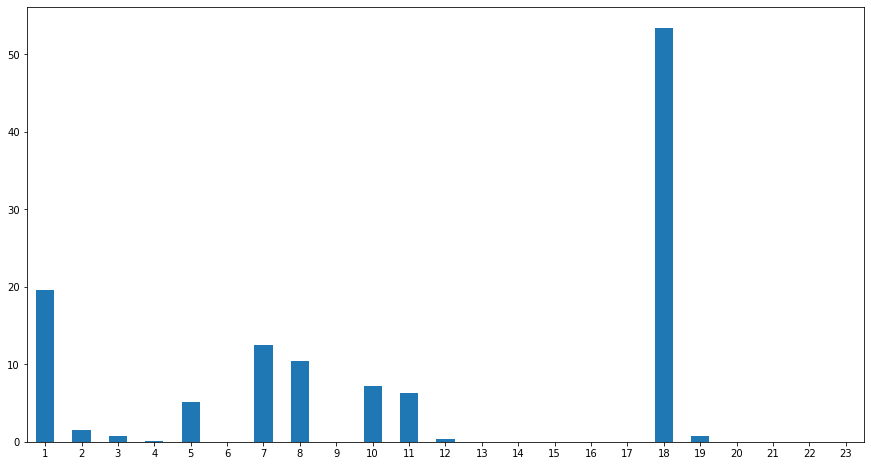

In [42]:
df_freq = pd.DataFrame(freq_treatments, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq = df_freq.rename(columns={"patient_nbr": "Treatments frequencies"})
df_freq = df_freq["Treatments frequencies"]
df_freq.plot.bar(rot=0, figsize=(15, 8))

<AxesSubplot:>

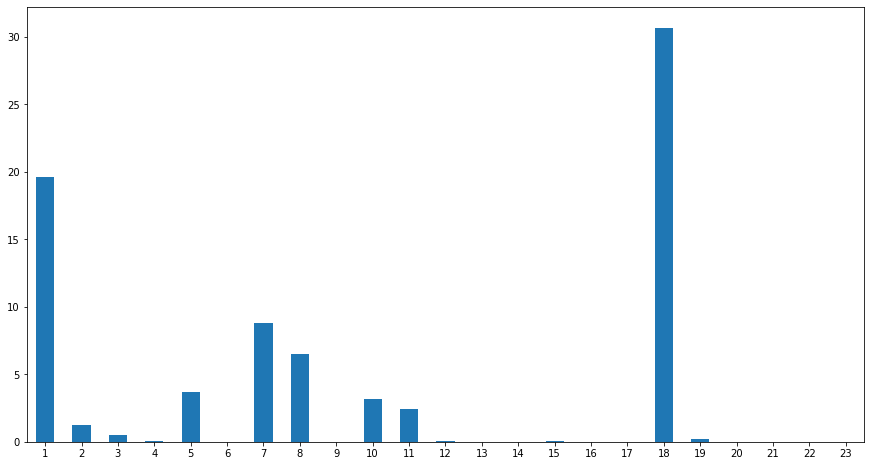

In [43]:
def count_treatments1(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T1'].str.contains(str(i)+'-', na=False) & ~df['T1'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments1 = normalize(count_treatments1(df2[["patient_nbr","T1"]]),101766)
df_freq1 = pd.DataFrame(freq_treatments1, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq1= df_freq1['patient_nbr']
df_freq1.plot.bar(rot=0, figsize=(15, 8))

<AxesSubplot:>

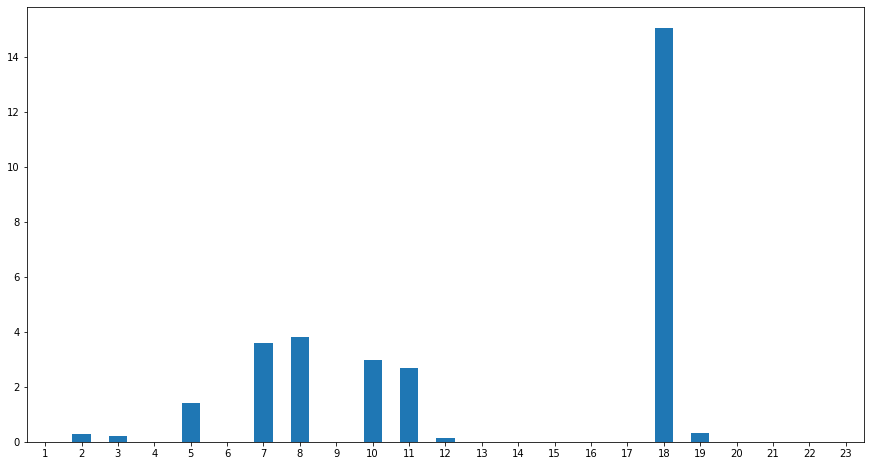

In [44]:
def count_treatments2(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T2'].str.contains(str(i)+'-', na=False) & ~df['T2'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments2 = normalize(count_treatments2(df2[["patient_nbr","T2"]]),101766)
df_freq2 = pd.DataFrame(freq_treatments2, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq2= df_freq2['patient_nbr']
df_freq2.plot.bar(rot=0, figsize=(15, 8))

<AxesSubplot:>

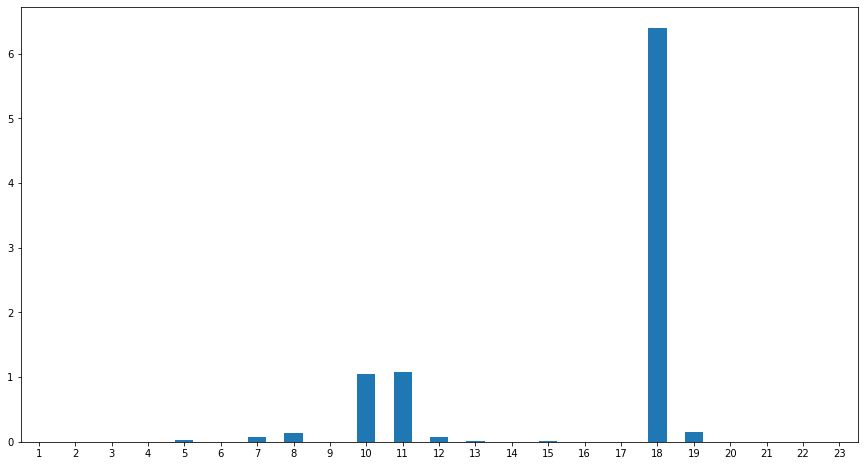

In [45]:
def count_treatments3(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T3'].str.contains(str(i)+'-', na=False) & ~df['T3'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments3 = normalize(count_treatments3(df2[["patient_nbr","T3"]]),101766)
df_freq3 = pd.DataFrame(freq_treatments3, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq3= df_freq3['patient_nbr']
df_freq3.plot.bar(rot=0, figsize=(15, 8))

<AxesSubplot:>

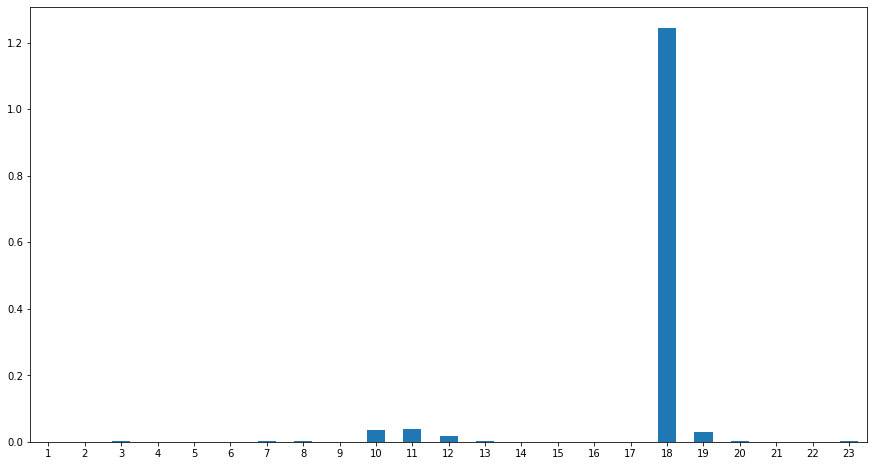

In [46]:
def count_treatments4(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T4'].str.contains(str(i)+'-', na=False) & ~df['T4'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments4 = normalize(count_treatments4(df2[["patient_nbr","T4"]]),101766)
df_freq4 = pd.DataFrame(freq_treatments4, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq4 = df_freq4['patient_nbr']
df_freq4.plot.bar(rot=0, figsize=(15, 8))

<AxesSubplot:>

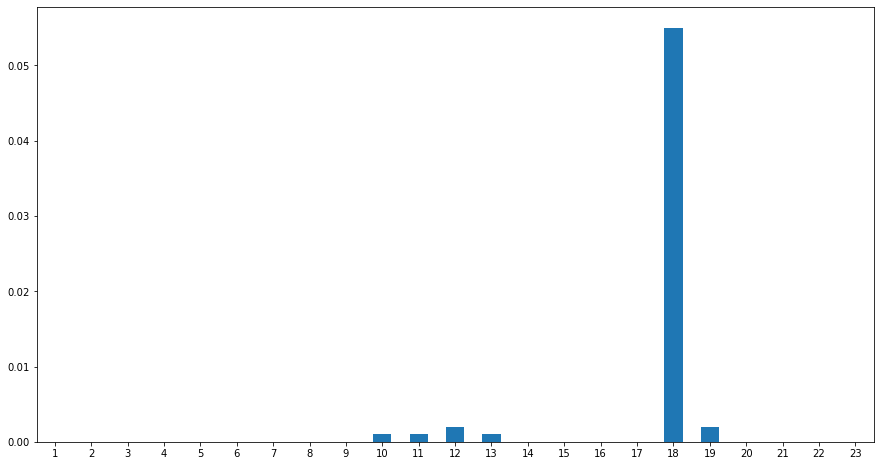

In [47]:
def count_treatments5(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T5'].str.contains(str(i)+'-', na=False) & ~df['T5'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments5 = normalize(count_treatments5(df2[["patient_nbr","T5"]]),101766)
df_freq5 = pd.DataFrame(freq_treatments5, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq5= df_freq5['patient_nbr']
df_freq5.plot.bar(rot=0, figsize=(15, 8))

<AxesSubplot:>

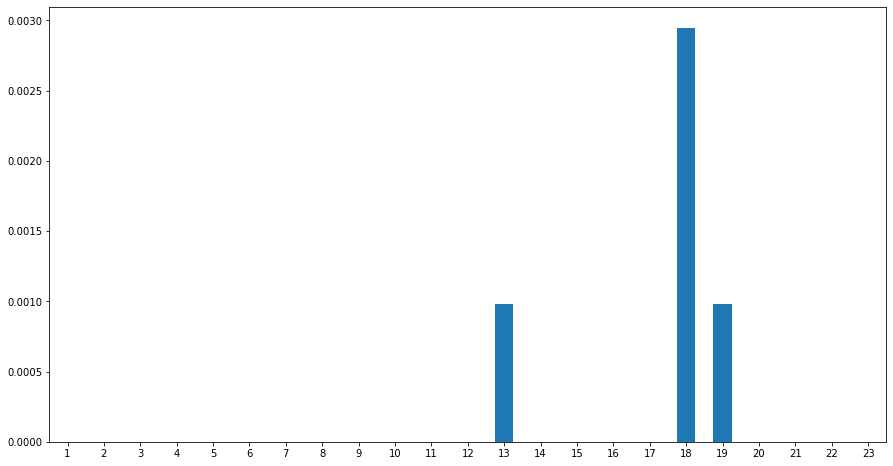

In [48]:
def count_treatments6(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T6'].str.contains(str(i)+'-', na=False) & ~df['T6'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments6 = normalize(count_treatments6(df2[["patient_nbr","T6"]]),101766)
df_freq6 = pd.DataFrame(freq_treatments6, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq6= df_freq6['patient_nbr']
df_freq6.plot.bar(rot=0, figsize=(15, 8))

# Traitement age


In [49]:
df_age = df2[["patient_nbr","age","T1","T2","T3","T4","T5","T6"]]
df_age

,patient_nbr,age,T1,T2,T3,T4,T5,T6
encounter_id,,,,,,,,
12522,48330783,[80-90),7-Steady,18-Steady,NaN,NaN,NaN,NaN
15738,63555939,[90-100),11-Steady,18-Steady,NaN,NaN,NaN,NaN
16680,42519267,[40-50),7-Steady,18-Steady,NaN,NaN,NaN,NaN
28236,89869032,[40-50),18-Steady,NaN,NaN,NaN,NaN,NaN
35754,82637451,[50-60),18-Steady,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
443847548,100162476,[70-80),1-Steady,18-Down,NaN,NaN,NaN,NaN
443847782,74694222,[80-90),18-Steady,NaN,NaN,NaN,NaN,NaN
443854148,41088789,[70-80),1-Steady,18-Down,NaN,NaN,NaN,NaN


In [50]:
df_age=df_age.sort_values(by=['age',"T1","T2","T3","T4","T5","T6"])
df_age

,patient_nbr,age,T1,T2,T3,T4,T5,T6
encounter_id,,,,,,,,
22575144,3355146,[0-10),18-Down,NaN,NaN,NaN,NaN,NaN
29869284,114570648,[0-10),18-Down,NaN,NaN,NaN,NaN,NaN
48108936,15778395,[0-10),18-Down,NaN,NaN,NaN,NaN,NaN
52801974,18840807,[0-10),18-Down,NaN,NaN,NaN,NaN,NaN
53862216,10799190,[0-10),18-Down,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
439591292,102128841,[90-100),NaN,NaN,NaN,NaN,NaN,NaN
441442370,91148022,[90-100),NaN,NaN,NaN,NaN,NaN,NaN
443139938,79902171,[90-100),NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_age_count_values = df_age.groupby("age").count()
df_age_count_values
# Remettre des Null au lieu des 0

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[0-10),161,133,0,0,0,0,0
[10-20),691,600,38,4,0,0,0
[20-30),1657,1315,191,70,9,0,0
[30-40),3775,2849,849,296,43,1,0
[40-50),9685,7405,2904,973,159,9,0
[50-60),17256,13401,5643,1875,307,15,0
[60-70),22483,17611,7575,2305,367,16,3
[70-80),26068,20191,8240,2277,339,16,1
[80-90),17197,12914,4933,1238,160,5,1


In [60]:
df_age2 = df_age[(df_age['T1'] != np.nan)].groupby("age").count()
df_age2

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[0-10),161,133,0,0,0,0,0
[10-20),691,600,38,4,0,0,0
[20-30),1657,1315,191,70,9,0,0
[30-40),3775,2849,849,296,43,1,0
[40-50),9685,7405,2904,973,159,9,0
[50-60),17256,13401,5643,1875,307,15,0
[60-70),22483,17611,7575,2305,367,16,3
[70-80),26068,20191,8240,2277,339,16,1
[80-90),17197,12914,4933,1238,160,5,1


In [61]:
df_age3 = df_age[(df_age['T1'] != np.nan)&(df_age['T2'] != np.nan)].groupby("age").count()
df_age3

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[0-10),161,133,0,0,0,0,0
[10-20),691,600,38,4,0,0,0
[20-30),1657,1315,191,70,9,0,0
[30-40),3775,2849,849,296,43,1,0
[40-50),9685,7405,2904,973,159,9,0
[50-60),17256,13401,5643,1875,307,15,0
[60-70),22483,17611,7575,2305,367,16,3
[70-80),26068,20191,8240,2277,339,16,1
[80-90),17197,12914,4933,1238,160,5,1


In [62]:
df_age4 = df_age[(df_age['T1'] != np.nan)&(df_age['T2'] != np.nan)&(df_age['T3'] != np.nan)].groupby("age").count()
df_age4

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[0-10),161,133,0,0,0,0,0
[10-20),691,600,38,4,0,0,0
[20-30),1657,1315,191,70,9,0,0
[30-40),3775,2849,849,296,43,1,0
[40-50),9685,7405,2904,973,159,9,0
[50-60),17256,13401,5643,1875,307,15,0
[60-70),22483,17611,7575,2305,367,16,3
[70-80),26068,20191,8240,2277,339,16,1
[80-90),17197,12914,4933,1238,160,5,1


In [63]:
df_age5 = df_age[(df_age['T1'] != np.nan)&(df_age['T2'] != np.nan)&(df_age['T3'] != np.nan)&(df_age['T4'] != np.nan)].groupby("age").count()
df_age5

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[0-10),161,133,0,0,0,0,0
[10-20),691,600,38,4,0,0,0
[20-30),1657,1315,191,70,9,0,0
[30-40),3775,2849,849,296,43,1,0
[40-50),9685,7405,2904,973,159,9,0
[50-60),17256,13401,5643,1875,307,15,0
[60-70),22483,17611,7575,2305,367,16,3
[70-80),26068,20191,8240,2277,339,16,1
[80-90),17197,12914,4933,1238,160,5,1


In [64]:
df_age6 = df_age[(df_age['T1'] != np.nan)&(df_age['T2'] != np.nan)&(df_age['T3'] != np.nan)&(df_age['T4'] != np.nan)&(df_age['T5'] != np.nan)].groupby("age").count()
df_age6

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[0-10),161,133,0,0,0,0,0
[10-20),691,600,38,4,0,0,0
[20-30),1657,1315,191,70,9,0,0
[30-40),3775,2849,849,296,43,1,0
[40-50),9685,7405,2904,973,159,9,0
[50-60),17256,13401,5643,1875,307,15,0
[60-70),22483,17611,7575,2305,367,16,3
[70-80),26068,20191,8240,2277,339,16,1
[80-90),17197,12914,4933,1238,160,5,1


In [65]:
df_age7 = df_age[(df_age['T1'] != np.nan)&(df_age['T2'] != np.nan)&(df_age['T3'] != np.nan)&(df_age['T4'] != np.nan)&(df_age['T5'] != np.nan)&(df_age['T6'] != np.nan)].groupby("age").count()
df_age7

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[0-10),161,133,0,0,0,0,0
[10-20),691,600,38,4,0,0,0
[20-30),1657,1315,191,70,9,0,0
[30-40),3775,2849,849,296,43,1,0
[40-50),9685,7405,2904,973,159,9,0
[50-60),17256,13401,5643,1875,307,15,0
[60-70),22483,17611,7575,2305,367,16,3
[70-80),26068,20191,8240,2277,339,16,1
[80-90),17197,12914,4933,1238,160,5,1


# Traitement ethnies


In [66]:
df_race = df2[["patient_nbr","race","T1","T2","T3","T4","T5","T6"]]
df_race = df_race.sort_values(by=['race',"T1","T2","T3","T4","T5","T6"])
df_race = df_race.drop(df_race[df_race.race == ""].index)
df_race

,patient_nbr,race,T1,T2,T3,T4,T5,T6
encounter_id,,,,,,,,
410222204,39313809,AfricanAmerican,1-Down,10-Steady,18-Down,NaN,NaN,NaN
123747186,24955920,AfricanAmerican,1-Down,10-Steady,18-Steady,NaN,NaN,NaN
100643640,24945534,AfricanAmerican,1-Down,10-Steady,NaN,NaN,NaN,NaN
122759922,34521003,AfricanAmerican,1-Down,11-Steady,18-Down,NaN,NaN,NaN
154786884,55925532,AfricanAmerican,1-Down,11-Steady,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
437307938,150631070,Other,NaN,NaN,NaN,NaN,NaN,NaN
437832998,145903622,Other,NaN,NaN,NaN,NaN,NaN,NaN
437953088,168496466,Other,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_race.groupby("race").count()


,patient_nbr,T1,T2,T3,T4,T5,T6
race,,,,,,,
AfricanAmerican,19210,14798,5397,1570,238,15,0
Asian,641,475,187,47,10,3,0
Caucasian,76099,58450,23531,6971,1068,42,4
Hispanic,2037,1551,659,209,32,1,0
Other,1506,1218,494,149,24,1,1


In [68]:
df_afam = df_race.drop(df_race[df_race.race != "AfricanAmerican"].index)
df_as = df_race.drop(df_race[df_race.race != "Asian"].index)
df_c = df_race.drop(df_race[df_race.race != "Caucasian"].index)
df_h= df_race.drop(df_race[df_race.race != "Hispanic"].index)


In [69]:
df_afam

,patient_nbr,race,T1,T2,T3,T4,T5,T6
encounter_id,,,,,,,,
410222204,39313809,AfricanAmerican,1-Down,10-Steady,18-Down,NaN,NaN,NaN
123747186,24955920,AfricanAmerican,1-Down,10-Steady,18-Steady,NaN,NaN,NaN
100643640,24945534,AfricanAmerican,1-Down,10-Steady,NaN,NaN,NaN,NaN
122759922,34521003,AfricanAmerican,1-Down,11-Steady,18-Down,NaN,NaN,NaN
154786884,55925532,AfricanAmerican,1-Down,11-Steady,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
442561946,97892019,AfricanAmerican,NaN,NaN,NaN,NaN,NaN,NaN
443149208,91200537,AfricanAmerican,NaN,NaN,NaN,NaN,NaN,NaN
443207462,100677726,AfricanAmerican,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
def count_treatments(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[(df['T1'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T1'].astype(str).str.contains(str(i+10)+'-', na=False)) | (df['T2'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T2'].astype(str).str.contains(str(i+10)+'-', na=False)) | (df['T3'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T3'].astype(str).str.contains(str(i+10)+'-', na=False)) | (df['T4'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T4'].astype(str).str.contains(str(i+10)+'-', na=False)) | (df['T5'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T5'].astype(str).str.contains(str(i+10)+'-', na=False)) | (df['T6'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T6'].astype(str).str.contains(str(i+10)+'-', na=False))].count()
        contained.append(contain_values)
    return contained

In [71]:
values_afam = count_treatments(df_afam)
values_as = count_treatments(df_as)
values_c = count_treatments(df_c)
values_h = count_treatments(df_h)

In [72]:
values_afam_norm = normalize(values_afam, 19210)
values_as_norm = normalize(values_as, 641)
values_c_norm = normalize(values_c, 76099)
values_h_norm = normalize(values_h, 2037)
df_afam_norm = pd.DataFrame(values_afam_norm,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_afam_norm = df_afam_norm.rename(columns={"patient_nbr": "AfricanAmerican"}).drop(["race","T1","T2","T3","T4","T5","T6"], axis=1)
df_as_norm = pd.DataFrame(values_as_norm,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_as_norm = df_as_norm.rename(columns={"patient_nbr": "Asian"}).drop(["race","T1","T2","T3","T4","T5","T6"], axis=1)
df_c_norm = pd.DataFrame(values_c_norm,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_c_norm = df_c_norm.rename(columns={"patient_nbr": "Caucasian"}).drop(["race","T1","T2","T3","T4","T5","T6"], axis=1)
df_h_norm = pd.DataFrame(values_h_norm,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_h_norm = df_h_norm.rename(columns={"patient_nbr": "Hispanic"}).drop(["race","T1","T2","T3","T4","T5","T6"], axis=1)


In [73]:
df_races= pd.concat([df_afam_norm, df_as_norm, df_c_norm, df_h_norm], axis=1)
df_races

,AfricanAmerican,Asian,Caucasian,Hispanic
1,18.214472,17.940718,19.883310,23.613157
2,0.926601,2.652106,1.668879,1.767305
3,0.853722,1.560062,0.647840,0.687285
4,0.031234,0.000000,0.099870,0.098184
5,4.232171,3.900156,5.303618,3.436426
6,0.000000,0.000000,0.001314,0.000000
7,10.983863,13.728549,12.782034,12.763868
8,8.771473,10.764431,10.910787,8.885616
9,0.005206,0.000000,0.027596,0.000000
10,5.747007,7.176287,7.584857,7.805596


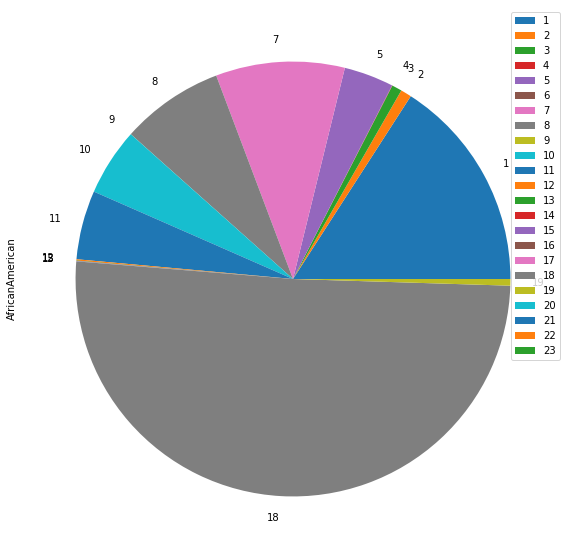

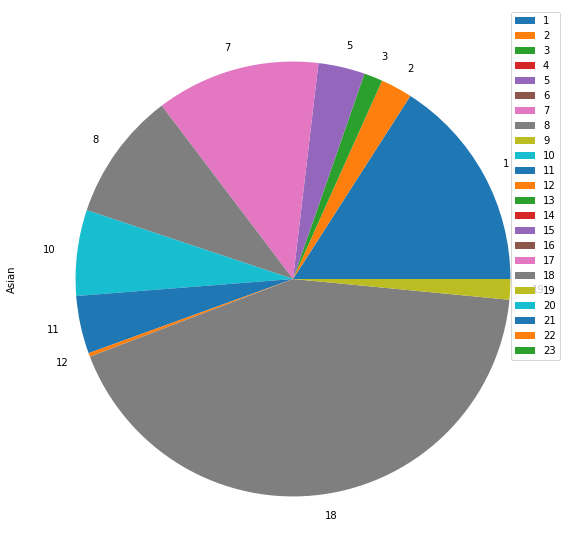

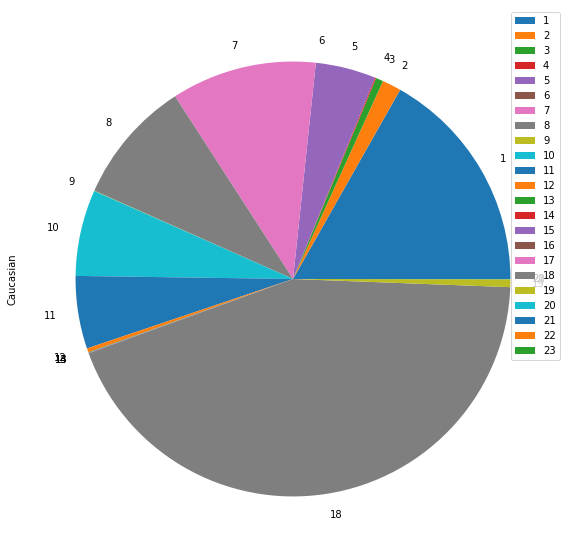

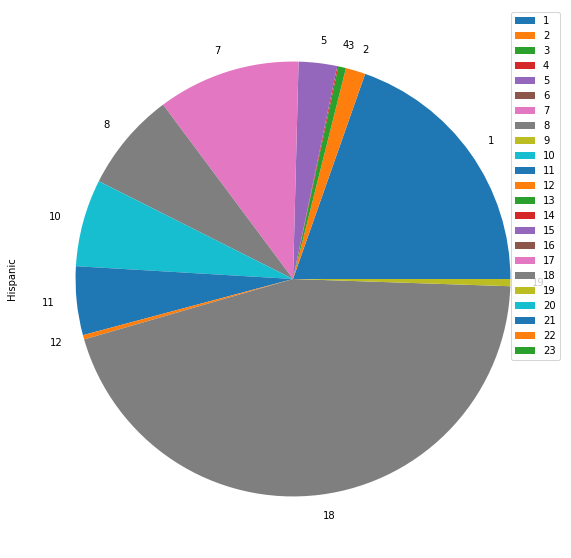

In [74]:
plot_afam = df_afam_norm.plot.pie(y='AfricanAmerican', figsize=(10, 10))
plot_as = df_as_norm.plot.pie(y='Asian', figsize=(10, 10))
plot_c = df_c_norm.plot.pie(y='Caucasian', figsize=(10, 10))
plot_h = df_h_norm.plot.pie(y='Hispanic', figsize=(10, 10))

In [ ]:
#Freq Steady Up, Down chaque traitement, voire en fonction de la position 
#Ecrire conclusions sur traitment qui mene à un autre